In [15]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../../core-scripts")
from Utilities import clean_spec_2D
import matplotlib.lines as mlines

In [2]:
# define the grid that Wan used to make figure 4
gdl,gdr,gdn = 0.0, 1.0, 11
gds = np.linspace(gdl, gdr, gdn)
al, ar, an = 0.0, 2.5, 26
acts = np.linspace(al, ar, an)

In [4]:
max_ev_k_var = np.zeros((an,gdn))

for i in range(gdn):
    for j in range(an):
        tmp_max_evs = []
        for k in range(21):
                tmp_max_evs.append(np.max(np.real(clean_spec_2D(k,gds[i],acts[j]))))
        max_ev_k_var[j][i] = np.max(np.real(np.array(tmp_max_evs)))
        print(f"    {j+1}/{an} activity values processed")
    print(f"{i+1}/{gdn} shear values processed")

    1/26 activity values processed
    2/26 activity values processed
    3/26 activity values processed
    4/26 activity values processed
    5/26 activity values processed
    6/26 activity values processed
    7/26 activity values processed
    8/26 activity values processed
    9/26 activity values processed
    10/26 activity values processed
    11/26 activity values processed
    12/26 activity values processed
    13/26 activity values processed
    14/26 activity values processed
    15/26 activity values processed
    16/26 activity values processed
    17/26 activity values processed
    18/26 activity values processed
    19/26 activity values processed
    20/26 activity values processed
    21/26 activity values processed
    22/26 activity values processed
    23/26 activity values processed
    24/26 activity values processed
    25/26 activity values processed
    26/26 activity values processed
1/11 shear values processed
    1/26 activity values processed
    2/26 a

    17/26 activity values processed
    18/26 activity values processed
    19/26 activity values processed
    20/26 activity values processed
    21/26 activity values processed
    22/26 activity values processed
    23/26 activity values processed
    24/26 activity values processed
    25/26 activity values processed
    26/26 activity values processed
9/11 shear values processed
    1/26 activity values processed
    2/26 activity values processed
    3/26 activity values processed
    4/26 activity values processed
    5/26 activity values processed
    6/26 activity values processed
    7/26 activity values processed
    8/26 activity values processed
    9/26 activity values processed
    10/26 activity values processed
    11/26 activity values processed
    12/26 activity values processed
    13/26 activity values processed
    14/26 activity values processed
    15/26 activity values processed
    16/26 activity values processed
    17/26 activity values processed
    18/26

In [20]:
# load in the data that Wan used to generate Figure 4 in her flow states manuscript
data_path = "../../wan-figure-4-data-comparison/"
wan_shears = np.loadtxt(data_path+"point_shear")
wan_activities = np.loadtxt(data_path+"point_activity")
wan_states = np.loadtxt(data_path+"point_state")

In [6]:
np.savetxt("../../wan-figure-4-data-comparison/inf_length_channel_evs", max_ev_k_var)

In [9]:
k_var_evs = np.loadtxt("../../wan-figure-4-data-comparison/inf_length_channel_evs")

Text(0, 0.5, '$a$')

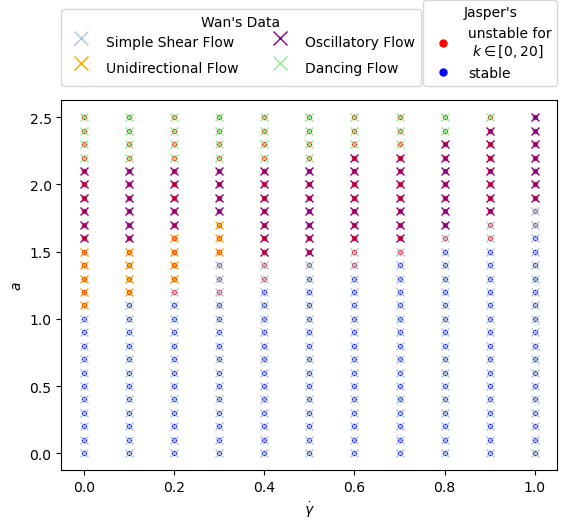

In [54]:
fig, ax = plt.subplots()
# plot computational results from my script
for i in range(gdn):
    for j in range(an):
        c = "red" if k_var_evs[j][i]>0 else "blue"
        plt.plot(gds[i], acts[j], ".", color=c, picker=True, alpha=0.8)
red_dot = mlines.Line2D([], [], color='red', marker='.', linestyle='None',
                      markersize=10, label='unstable for\n $k\in[0,20]$')
blue_dot = mlines.Line2D([], [], color='blue', marker='.', linestyle='None',
                      markersize=10, label='stable')
my_legend = ax.legend(handles=[red_dot, blue_dot], loc=(0.73,1.04), title="Jasper's")
ax.add_artist(my_legend)

# plot Wan's data on the same plot
num_points = len(wan_shears)
for i in range(num_points):
    if wan_states[i] == 0:
        c = "lightsteelblue"
    elif wan_states[i] == 2:
        c = "orange"
    elif wan_states[i] == 3:
        c = "purple"
    elif wan_states[i] == 4:
        c = "lightgreen"
    ax.plot(wan_shears[i], wan_activities[i], 'x', color=c, alpha=1.0)
lightblue_cross = mlines.Line2D([], [], color='lightsteelblue', marker='x', linestyle='None',
                      markersize=10, label='Simple Shear Flow')
orange_cross = mlines.Line2D([], [], color='orange', marker='x', linestyle='None',
                      markersize=10, label='Unidirectional Flow')
purple_cross = mlines.Line2D([], [], color='purple', marker='x', linestyle='None',
                      markersize=10, label='Oscillatory Flow')
lightgreen_cross = mlines.Line2D([], [], color='lightgreen', marker='x', linestyle='None',
                      markersize=10, label='Dancing Flow')
ax.legend(handles=[lightblue_cross, orange_cross, purple_cross, lightgreen_cross], ncol=2,handleheight=2.4, labelspacing=0.05, loc=(0,1.04), title="Wan's Data")
plt.xlabel("$\dot\gamma$")
plt.ylabel("$a$")

# 5/31/2023
# As expected, there is some discrepancy between my infinite-length channel stability vs. 
# Wan's finite-length situation. Given that increasing k destabilizes the system at high 
# shear values, we would expect this discrepancy to grow at larger shear values than 2 here.
#
# I wonder though, if it is actually the wavenumbers that Wan's system cannot hold giving rise to the 
# instability?